In [1]:
from dataloader import DAVIS_Seq2, normalize_image, BallDataset, Balltest
from model import FeatupExtra, CoordConv
from ModelInfer import ModelInfer
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import PIL.Image as Image
import numpy as np
from preprocess_utensils import get_gray_image, get_boundary_iou
import json
from loss import order_loss, chamer_distance_loss
import random

In [11]:
model_name = "ras_featConv"
feat_dim = 384
model = FeatupExtra(
    nn.Sequential(
        nn.Conv2d(
            in_channels=feat_dim,
            out_channels=feat_dim,
            kernel_size=3,
            padding=1,
            stride=1,
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=feat_dim,
            out_channels=feat_dim,
            kernel_size=3,
            padding=1,
            stride=1,
        ),
        nn.ReLU(),
    ),
).cuda()
loss_log_path = f"./log/{model_name}_loss.json"
iou_log_path = f"./log/{model_name}_iou.json"
model_path = f"./model/{model_name}.pth"
log_path = f"./log/{model_name}.log"

another_model_name = "featupConv"
another_loss_log_path = f"./log/{another_model_name}_loss.json"
another_iou_log_path = f"./log/{another_model_name}_iou.json"

Using cache found in /zhome/32/f/202284/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /zhome/32/f/202284/.cache/torch/hub/facebookresearch_dino_main


In [12]:
with open(loss_log_path, "r") as f:
    dict_loss = json.load(f)
with open(iou_log_path, "r") as f:
    dict_iou = json.load(f)

with open(another_loss_log_path, "r") as f:
    another_dict_loss = json.load(f)
with open(another_iou_log_path, "r") as f:
    another_dict_iou = json.load(f)

In [13]:
numeric_dict_loss = {}
for key, value in dict_loss.items():
    numeric_dict_loss[int(key)] = float(value)
numeric_dict_iou = {}
for key, value in dict_iou.items():
    numeric_dict_iou[int(key)] = float(value)
dict_loss = numeric_dict_loss
dict_iou = numeric_dict_iou

In [14]:
numeric_dict_loss = {}
for key, value in another_dict_loss.items():
    numeric_dict_loss[int(key)] = float(value)
numeric_dict_iou = {}
for key, value in another_dict_iou.items():
    numeric_dict_iou[int(key)] = float(value)
another_dict_loss = numeric_dict_loss
another_dict_iou = numeric_dict_iou

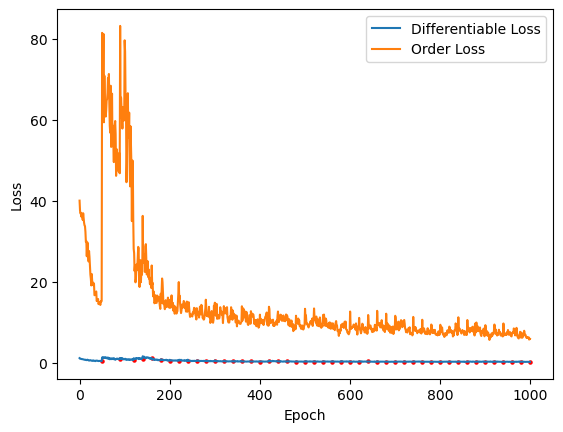

In [15]:
# plot the loss
plt.plot(
    list(dict_loss.keys()),
    list(dict_loss.values()),
    label="Differentiable Loss",
)
plt.plot(
    list(another_dict_loss.keys()),
    list(another_dict_loss.values()),
    label="Order Loss",
)
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plot the update points
plt.scatter(
    list(dict_iou.keys()),
    [dict_loss[i - 1] for i in list(dict_iou.keys())],
    c="r",
    s=5,
)
plt.legend()
plt.show()

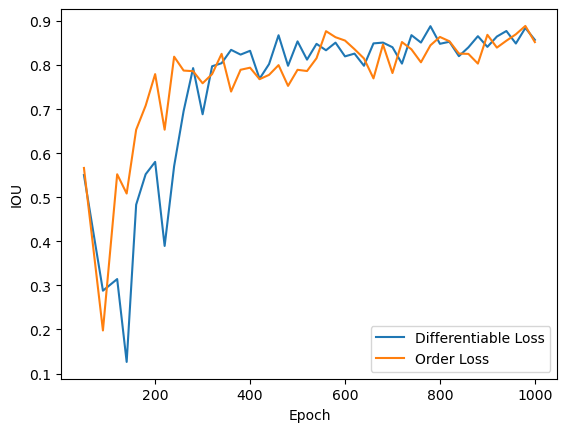

In [16]:
# plot the iou
plt.plot(
    list(dict_iou.keys()),
    list(dict_iou.values()),
    label="Differentiable Loss",
)
plt.plot(
    list(another_dict_iou.keys()),
    list(another_dict_iou.values()),
    label="Order Loss",
)
plt.xlabel("Epoch")
plt.ylabel("IOU")
plt.legend()
plt.show()

In [7]:
# load the model
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [8]:
testset = Balltest("ellipse/uniform_samples_80.json")
model_infer = ModelInfer(testset)

In [9]:
model_infer.infer_model(model)

/work3/s232248/miniconda3/envs/ras/lib/python3.12/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025824022/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


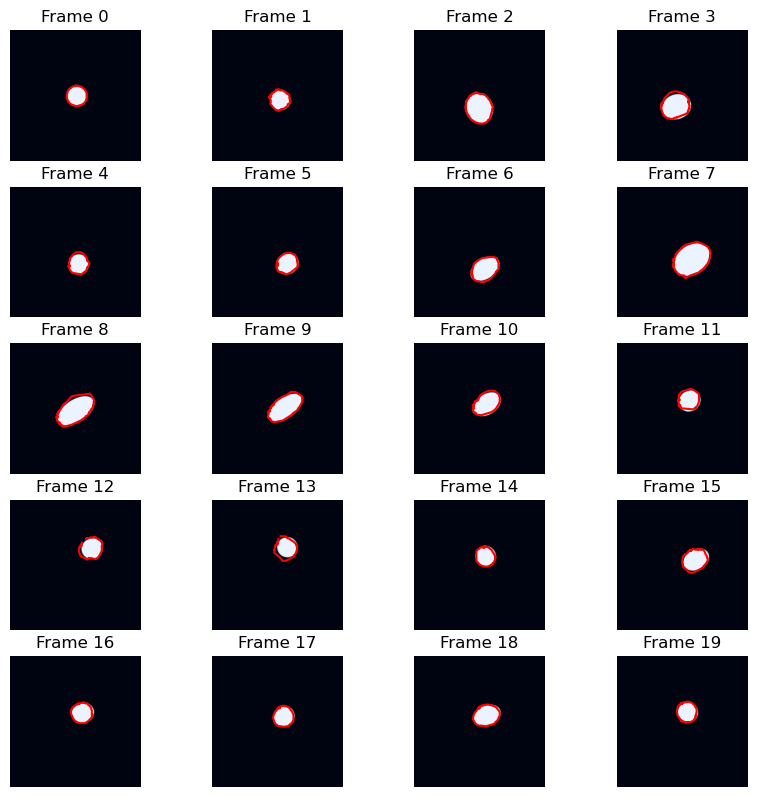

0.8573668090464339

In [10]:
model_infer.show_infer_result(0)